# Simple Pendulum

In this notebook, we're solving the simple pendulum problem analytically and numerically. The simple pendulum is a classical example of a nonlinear, second-order, ordinary differential equation (ODE).

## Problem Statement

The simple pendulum is a mass $m$ attached to a massless, frictionless rod of length $l$ that is free to rotate about a fixed point. The pendulum is released from rest at an angle $\theta_0$ from the vertical

## Necessary libraries
* `numpy` - for numerical calculations
* `matplotlib` - for plotting
* `scipy.integrate` - for solving ODEs
* `sympy` - for symbolic calculations

Run the next cell in case you don't have these libraries installed.

In [1]:
%pip install sympy numpy matplotlib scipy --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from IPython.display import HTML
import sympy as sym

## Definitions


We need to define the following constants and variables:

* $g$ - acceleration due to gravity
* $l$ - length of the pendulum
* $m$ - mass of the pendulum
* $\theta$ - angle of the pendulum from the vertical (function of time)
* $t$ - time

In [3]:
g = sym.symbols('g')
l = sym.symbols('l')
m = sym.symbols('m')
t = sym.symbols('t')
theta = sym.symbols(r'\theta', cls=sym.Function)
theta = theta(t)

Now we need to define $x$ and $y$ in terms of $\theta$.

* $x$ - horizontal position of the pendulum - $x = l \sin(\theta)$
* $y$ - vertical position of the pendulum - $y = -l \cos(\theta)$

In [4]:
x = l * sym.sin(theta)
y = -l * sym.cos(theta)

Once we have $x$ and $y$, we can get the kinetic and potential energies of the pendulum.

* $T$ - kinetic energy of the pendulum 
    $$T = \frac{1}{2} m \dot{x}^2 + \frac{1}{2} m \dot{y}^2$$
* $V$ - potential energy of the pendulum
    $$V = m g y$$

In [5]:
# Kinetic energy
T = sym.Rational(1, 2) * m * (x.diff(t) ** 2 + y.diff(t) ** 2)

# Potential energy
V = m * g * y

Now, we can get the Lagrangian of the pendulum.

* $L$ - Lagrangian of the pendulum - $L = T - V$

In [6]:
L = T - V

In [7]:
L.simplify()

l*m*(2*g*cos(\theta(t)) + l*Derivative(\theta(t), t)**2)/2

With the Lagrangian, we can get the equations of motion.

$$\frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}} - \frac{\partial L}{\partial \theta} = 0$$

In [8]:
LE = (sym.diff(sym.diff(L, sym.diff(theta, t)), t) - sym.diff(L, theta)).simplify()

Now, let's solve the equation for $\ddot{\theta}$.

In [9]:
sol = sym.solve(LE, sym.diff(theta, t, t), simplify=False, rational=False)

In [10]:
sol[0]

-g*sin(\theta(t))/l

With the analitycal solution for $\ddot{\theta}$, we can get the numerical solution for $\dot{\theta}$ and $\theta$.

In [11]:
sol_f = sym.lambdify((t, theta, sym.diff(theta, t), g, l, m), sol[0])

Let's define a vector $\vec{S}$ that returns $\frac{d\vec{S}}{dt}$.

In [12]:
def dSdt(S, t, g, l, m):
    theta, omega = S
    dtheta_dt = omega
    domega_dt = sol_f(t, theta, omega, g, l, m)
    return dtheta_dt, domega_dt

Now, let's plot the results.

In [4]:
t = np.linspace(0, 40, 1001)
theta0 = np.pi * 0.12
theta_dot0 = 0.5
g = 9.81
l = 1
m = 1

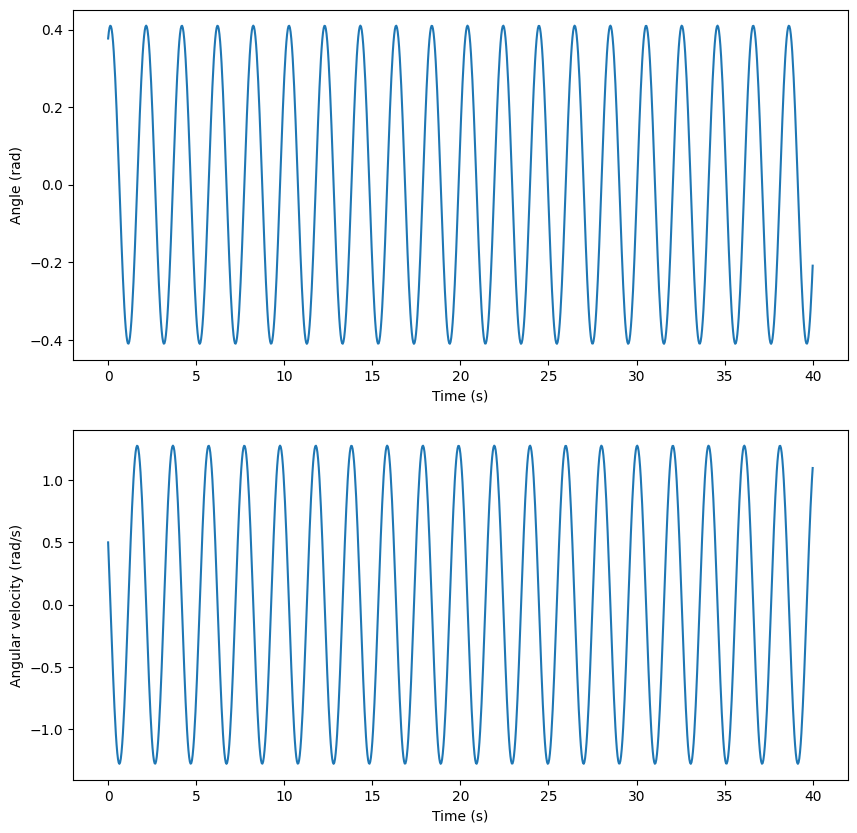

In [14]:
ans = odeint(dSdt, (theta0, theta_dot0), t, args=(g, l, m))

# Plot of the position and velocity of the pendulum
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(t, ans[:, 0])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Angle (rad)')
ax[1].plot(t, ans[:, 1])
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Angular velocity (rad/s)')
plt.show()

Plot phase space using streamplots.

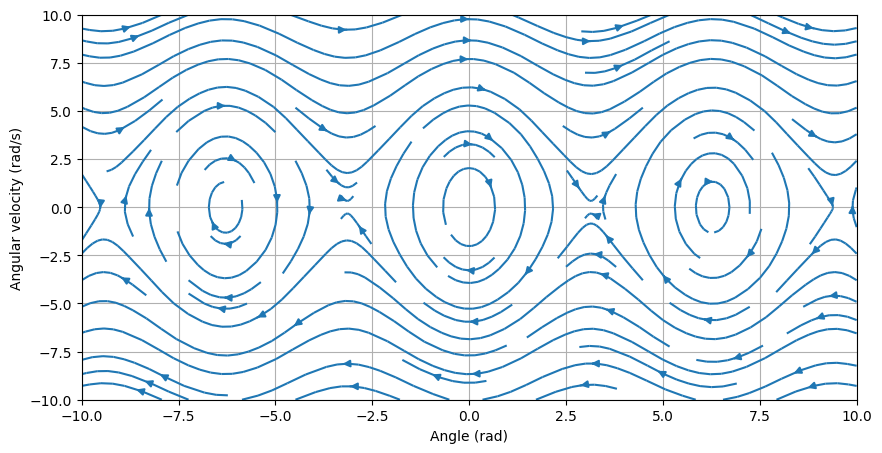

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x_values, y_values = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
u_values = y_values
v_values = -g/l * np.sin(x_values)
ax.streamplot(x_values, y_values, u_values, v_values)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Angular velocity (rad/s)')
ax.grid()
plt.show()

To create an animation, we need to define a function that returns $x$ and $y$ coordinates for each frame.

In [15]:
def get_x_y(theta, l):
    x = l * np.sin(theta)
    y = -l * np.cos(theta)
    return x, y

KeyboardInterrupt: 

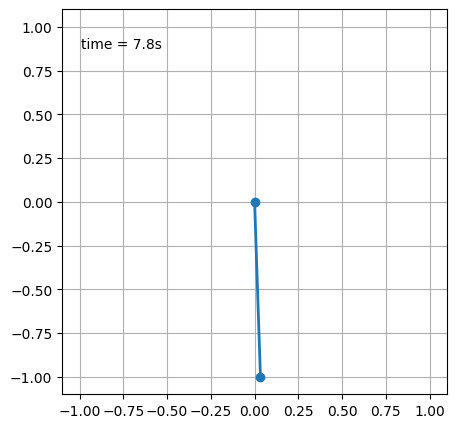

In [16]:
# Animation of the pendulum
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# X and Y coordinates of the pendulum
x, y = get_x_y(ans[:, 0], l)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i * t[1]))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(ans)),
                                interval=25, blit=True, init_func=init)

plt.rcParams['animation.embed_limit'] = 100
HTML(ani.to_jshtml())